# Case Study 1 : Data Science in Twitter Data

**Required Readings:** 
* Chapter 1 and Chapter 9 of the book [Mining the Social Web](http://cdn.oreillystatic.com/oreilly/booksamplers/9781449367619_sampler.pdf) 
* The codes for [Chapter 1](http://bit.ly/1qCtMrr) and [Chapter 9](http://bit.ly/1u7eP33)
* [TED Talks](https://www.ted.com/talks) for examples of 10 minutes talks.


** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem: pick a data science problem that you plan to solve using Twitter Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using twitter data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

How should companies, such as Nike, Under Armour, etc.,
determine how much apparel should be made 
for a college basketball team based on popularity so 
they can prevent both over and under-ordering?
This is interesting and important because, most of these
companies will donate any money they see as excess profit to nonprofit, 
charitable organizations.  Since these charities do 
not keep any excess money at the end of the fiscal year, 
they must spend it on things that help benefit or push the
image and goal of their organization. With increased savings,
the company can donate more to charities and to fund new ideas
and research- helping the company reputation, the charity, and 
development of both organizations.

## Data Collection: Download Twitter Data using API

* In order to solve the above problem, you need to collect some twitter data. You could select a topic that is relevant to your problem, and use Twitter API to download the relevant tweets. It is recommended that the number of tweets should be larger than 200, but smaller than 1 million.
* Store the tweets you downloaded into a local file (txt file or json file) 

In [21]:
import twitter
import json

#---------------------------------------------
# Define a Function to Login Twitter API
def oauth_login():
    # Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = 'OjFqprqiUJesOcuetehAyIEyq'
    CONSUMER_SECRET ='AABaOvpj5wxeX19cFwVYsRSmVzrqqdKamU702ENSPVLMDN3jyR'
    OAUTH_TOKEN = '842521882217930753-dcaJVacfwBjhMbHAPa2b2BfOhUj6Hfv'
    OAUTH_TOKEN_SECRET = 'jxFAtIW57LvKK5J1berSOyVB9e0y1u5ipthtEfcjvcCAb'
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

tapi = oauth_login();
q = '#MarchMadness'

teams = ["Ducks", "Wolverines", "Mountaineers", "Bulldogs"]
teamcounter = dict((x,0) for x in teams)

In [22]:
#Variables controlling tweet batch size
count = 100
cap = 5000
maxiterations = 2000

#Construct the query to contain #MarchMadness as well as teams specified above
q += ' (#' + ' OR #'.join(str(x) for x in teams) + ')'
print q

#Perform a search query using the twitter api
search_results = tapi.search.tweets(q=q, count=count)

#Create a variable that holds all of the statuses from tweets collected
statuses = search_results['statuses']

#Usinging the next_results field to generate new queries, continue to add
#twitter data to the statuses variable
for __ in range(maxiterations):
    print "Length of statuses", len(statuses)
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError, e: # No more results when next_results doesn't exist
        print "done"
        break
    
    if (len(statuses) >= cap):
        print "done"
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=q&include_entities=1
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    # removes clutter from the new query
    for key, value in kwargs.iteritems():
        kwargs[key] = value.replace('%25', '%')
        
    search_results = tapi.search.tweets(**kwargs)
    statuses += search_results['statuses']

#Save twitter data into a local file
with open('data.json', 'w') as outfile:
    json.dump(statuses, outfile)
    print 'file exported'

#MarchMadness (#Ducks OR #Wolverines OR #Mountaineers OR #Bulldogs)
Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 500
Length of statuses 600
Length of statuses 700
Length of statuses 800
Length of statuses 900
Length of statuses 1000
Length of statuses 1100
Length of statuses 1200
Length of statuses 1300
Length of statuses 1343
done
file exported


### Report  statistics about the tweets you collected 

In [23]:
# The total number of tweets collected: 
import json
import re

with open('data.json', 'r') as infile:
    statuses = json.load(infile)

i=0
for status in statuses:
    i+=1
    
print 'Number of tweets collected: ' + str(i)

Number of tweets collected: 1343


# Data Exploration: Exploring the Tweets and Tweet Entities

**(1) Word Count:** 
* Load the tweets you collected in the local file (txt or json)
* compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 most-frequent words with their counts

In [24]:
import json
from prettytable import PrettyTable
from collections import Counter

#grab tweet data from local file
with open('data.json', 'r') as infile:
    statuses = json.load(infile)

#list of text in each tweet
status_texts = [ status['text']
                for status in statuses ]

#list of all words in each 
words = [w
        for t in status_texts
            for w in t.split() ]

#removes common words from the list of most common words
commonwords = ["to", "the", "is", "in", "for", "a", "on", "of", "and", "from", "it", "if", "at", "our", "my", "has", "over", "are", "with", "RT"]
c = Counter(words)
for word in list(c):
    if word in commonwords:
        del c[word]

#creates a table of the most frequent words
pt = PrettyTable(field_names=['Word', 'Count'])
[ pt.add_row(kv) for kv in c.most_common()[:30] ]
pt.align['Word'], pt.align['Count'] = '1', 'r'

print pt

+-------------------+-------+
|        Word       | Count |
+-------------------+-------+
|   #marchmadness   |   815 |
|   #MarchMadness   |   469 |
|    #Wolverines    |   438 |
|  #NCAATournament  |   284 |
|   #Mountaineers   |   256 |
|     #Michigan     |   207 |
|       #Ducks      |   178 |
|        Beat       |   155 |
|       #UMich      |   148 |
|   @_ElleJohnson:  |   144 |
|        #WVU       |   117 |
|      #GoBlue      |   111 |
|       #ducks      |   103 |
|      #SWEET16     |    99 |
|    #Wolverines!   |    88 |
|     officially    |    86 |
|       begun       |    84 |
|     #okstate!     |    84 |
|      #Sweet16     |    84 |
|     #GoBlue!!!    |    84 |
| https://t.co/RH4… |    83 |
|     #Bulldogs     |    77 |
|      #Oregon      |    76 |
|         go        |    75 |
|         I         |    73 |
|       Let's       |    69 |
|    #wolverines    |    64 |
|     #GoBlue!!     |    63 |
|      #Gonzaga     |    63 |
|       time!       |    63 |
+---------

** (2) Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 most-retweeted tweets in your collection, i.e., the tweets with the largest number of retweet counts.


In [25]:
import json
from prettytable import PrettyTable

#Load in tweet data from local file
with open('data.json', 'r') as infile:
    statuses = json.load(infile)

#Create a tuple containing tweet_count, screen_name, and text to be sorted
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if status.has_key('retweeted_status')
           ]

#initialize list for top 10 retweets
retweeted = [None]*10

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
i = 0

#Looks through all the sorted (by retweet count) retweets and adds unique ones into the final list
for row in sorted(retweets, reverse=True):
    if row not in retweeted and i < 10:
        retweeted[i] = row
        i+=1
        pt.add_row(row)

#creates and prints a table of the final list
pt.max_width['Text'] = 40
pt.align= 'l'
print pt

+-------+----------------+------------------------------------------+
| Count | Screen Name    | Text                                     |
+-------+----------------+------------------------------------------+
| 100   | _ElleJohnson   | RT @_ElleJohnson: #GoBlue!!!             |
|       |                | #marchmadness has officially begun for   |
|       |                | my #UMich #Wolverines! Beat #okstate!    |
|       |                | #NCAATournament https://t.co/RH4…        |
| 74    | _ElleJohnson   | RT @_ElleJohnson: Revenge time!          |
|       |                | #GoBlue!! Beat #Louisville!              |
|       |                | #NCAATournament #marchmadness #UMich     |
|       |                | #Michigan #Wolverines over #Cardinals!   |
|       |                | htt…                                     |
| 19    | MaizenBrew     | RT @MaizenBrew: On to Round 2!           |
|       |                | #Wolverines #marchmadness                |
|       |           

**(3) Find the most popular Tweet Entities in your collection of tweets**

Please plot the top 10 most-frequent hashtags and top 10 most-mentioned users in your collection of tweets.

In [26]:
with open('data.json', 'r') as infile:
    statuses = json.load(infile)

status_texts = [ status['text']
                for status in statuses ]

# splits the text into individual words
words = [w
        for t in status_texts
            for w in t.split() ]

# filter all of the words not containing a '#' from the list of words to remove all non-hashtags
hashtags = Counter(words)
for word in list(hashtags):
    if "#" not in word:
        del hashtags[word]
        
# get the top 10 most mentioned hashtags from a list of hashtags
most_common_hashtags = hashtags.most_common()[:10]  

# filter all of the words not contianing an '@' from the list of words to remove all non-user words
users = Counter(words)
for word in list(users):
    if "@" not in word or len(word) < 2:
        del users[word]
        
# get the top 10 most mentioned usernames from the list of usernames
most_common_users = users.most_common()[:10] 
        
# print a table of the most common hashtags in our collected tweets
htpt = PrettyTable(field_names=['Hashtag', 'Count'])
[ htpt.add_row(kv) for kv in most_common_hashtags ]
htpt.align['Word'], htpt.align['Count'] = '1', 'r'
print htpt

# print a table of the most common user mentions in our collected tweets
umpt = PrettyTable(field_names=['Username', 'Count'])
[ umpt.add_row(kv) for kv in most_common_users ]
umpt.align['Word'], htpt.align['Count'] = '1', 'r'
print umpt

+-----------------+-------+
|     Hashtag     | Count |
+-----------------+-------+
|  #marchmadness  |   815 |
|  #MarchMadness  |   469 |
|   #Wolverines   |   438 |
| #NCAATournament |   284 |
|  #Mountaineers  |   256 |
|    #Michigan    |   207 |
|      #Ducks     |   178 |
|      #UMich     |   148 |
|       #WVU      |   117 |
|     #GoBlue     |   111 |
+-----------------+-------+
+----------------+-------+
|    Username    | Count |
+----------------+-------+
| @_ElleJohnson: |  144  |
|  @umichbball   |   51  |
|   @WVUhoops    |   29  |
|   @OregonMBB   |   29  |
| @WestVirginiaU |   22  |
|    @Rivals:    |   20  |
|  @MaizenBrew:  |   17  |
|  @Thee_LB53:   |   16  |
|    Huggins@    |   15  |
|  @FOX2Sports:  |   14  |
+----------------+-------+


Plot a histogram of the number of user mentions in the list using the following bins.

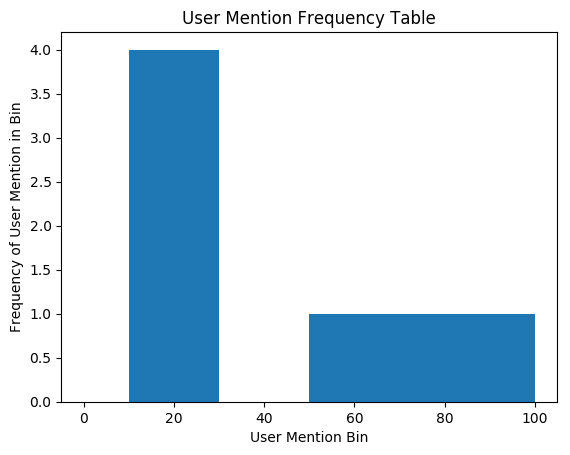

In [27]:
bins=[0, 10, 20, 30, 40, 50, 100]

import matplotlib.pyplot as plt
import numpy as np    

# labeling the graph
plt.title('User Mention Frequency Table')
plt.xlabel('User Mention Bin')
plt.ylabel('Frequency of User Mention in Bin')

# loading our data into the graph
plt.hist([x[1] for x in most_common_users], bins)
plt.show()






 ** (4) Getting "All" friends and "All" followers of a popular user in the tweets**

* choose a popular twitter user who has many followers in your collection of tweets.
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [28]:
import json
from prettytable import PrettyTable

#open twitter data
with open('data.json', 'r') as infile:
    statuses = json.load(infile)

#tuple containing a users follower count and screen name for every tweet collected
followercounts = [
                (status['user']['followers_count'], 
                 status['user']['screen_name'])
                 for status in statuses
                 ]

#finds the user with the most followers
mostpopularuser = max(followercounts)
print 'User: ' + mostpopularuser[1] + ' Follower_count: ' + str(mostpopularuser[0])

#builds two list of 20 ids for the users following and users that are friends with the popular user
followerids = tapi.followers.ids(screen_name = mostpopularuser[1], count=22)['ids']
friendids = tapi.friends.ids(screen_name = mostpopularuser[1], count=22)['ids']

#gets detailed user information using the id lists
followers = tapi.users.lookup(user_id=followerids)
friends = tapi.users.lookup(user_id=friendids)

#tuples that contain a users id and username
followerinfo = [
              (user['id'],
               user['screen_name'])
               for user in followers 
               ]
friendinfo = [
              (user['id'],
               user['screen_name'])
               for user in friends 
               ]

#creates tables for the friends and for the followers
pt = PrettyTable(field_names=['ID', 'Username'])
[ pt.add_row(user) for user in followerinfo]
pt.align['ID'], pt.align['Username'] = 'l', 'l'
print 'Follower List'   
print pt

pt = PrettyTable(field_names=['ID', 'Username'])
[ pt.add_row(user) for user in friendinfo ]
pt.align['ID'], pt.align['Username'] = 'l', 'l'
print 'Friend List'   
print pt

User: SPORT1 Follower_count: 568070
Follower List
+-----------+----------------+
| ID        | Username       |
+-----------+----------------+
| 326143683 | portierjohan17 |
+-----------+----------------+
Friend List
+------------+-----------------+
| ID         | Username        |
+------------+-----------------+
| 327331784  | Kerry_Hau       |
| 87249115   | alenagerber     |
| 144318730  | altobelli13     |
| 1964370985 | MichaelPrieler  |
| 1860250034 | Koelner_Haie_72 |
| 1961402887 | LoLGrabbZ       |
| 30856425   | TotalRugby      |
+------------+-----------------+


# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

Using the data collected from the twitter api, we help
companies reduce overstock of products that do not appeal
to the general market. This generates less backlash and more profit. 
With these companies donating excess profit they make
in a fiscal year, they are not only boosting their PR, 
but also helping charity research.

Write codes to implement the solution in python:

In [29]:
import json
import re

with open('data.json', 'r') as infile:
    statuses = json.load(infile)
    
status_texts = [ status['text']
                for status in statuses ]

for text in status_texts:
    for w in re.findall(r"\w+", text):
        if w in teamcounter:
            teamcounter[w] += 1

# grabbing the frequency and team names out of the tupil
team_frequency = [count for team, count in teamcounter.iteritems()]    
team_names = [team for team, count in teamcounter.iteritems()]            

print 'Team name, # of tweets'
print teamcounter

total_tweets = sum(team_frequency)
percentages = [(team, (str(round(float(count)/float(total_tweets) * 100, 2))) + "%") for team, count in teamcounter.iteritems()] 

print 'Team name, % of tweets'
print percentages

Team name, # of tweets
{'Wolverines': 550, 'Mountaineers': 306, 'Bulldogs': 92, 'Ducks': 213}
Team name, % of tweets
[('Wolverines', '47.37%'), ('Mountaineers', '26.36%'), ('Bulldogs', '7.92%'), ('Ducks', '18.35%')]


# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


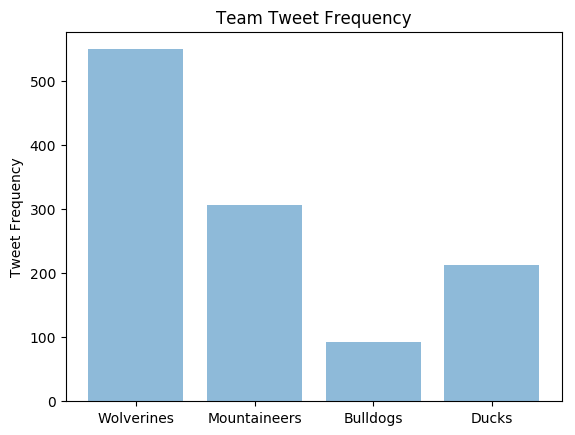

In [30]:
import matplotlib.pyplot as barplt; barplt.rcdefaults()
import numpy as np
import matplotlib.pyplot as barplt

# loading the data into the graph and labeling it
y_pos = np.arange(len(team_names))
barplt.bar(y_pos, team_frequency, align='center', alpha=0.5)
barplt.xticks(y_pos, team_names)
barplt.ylabel('Tweet Frequency')
barplt.title('Team Tweet Frequency')
 
barplt.show()

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . Each team present their case studies in class for 10 minutes.

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through Canvas, in the Assignment "Case Study 1".
        
** Note: Each team only needs to submit one submission in Canvas **


# Peer-Review Grading Template:

** Total Points: (100 points) ** Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.

Please add an "**X**" mark in front of your rating: 

For example:

*2: bad*
          
**X** *3: good*
    
*4: perfect*


    ---------------------------------
    The Problem: 
    ---------------------------------
    
    1. (5 points) how well did the team describe the problem they are trying to solve using twitter data? 
       0: not clear
       1: I can barely understand the problem
       2: okay, can be improved
       3: good, but can be improved
       4: very good
       5: crystal clear
    
    2. (10 points) do you think the problem is important or has a potential impact?
        0: not important at all
        2: not sure if it is important
        4: seems important, but not clear
        6: interesting problem
        8: an important problem, which I want to know the answer myself
       10: very important, I would be happy invest money on a project like this.
    
    ----------------------------------
    Data Collection:
    ----------------------------------
    
    3. (10 points) Do you think the data collected are relevant and sufficient for solving the above problem? 
       0: not clear
       2: I can barely understand what data they are trying to collect
       4: I can barely understand why the data is relevant to the problem
       6: the data are relevant to the problem, but better data can be collected
       8: the data collected are relevant and at a proper scale (> 300 tweets)
      10: the data are properly collected and they are sufficient

    -----------------------------------
    Data Exploration:
    -----------------------------------
    4. How well did the team solve the following task:
    (1) Word Count (5 points):
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect
    
    (2) Find the most popular tweets in your collection of tweets: (5 points)
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect
    
    (3) Find popular twitter entities  (5 points)
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect

    (4) Find user's followers and friends (5 points)
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect

    -----------------------------------
    The Solution
    -----------------------------------
    5.  how well did the team describe the solution they used to solve the problem? 
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
       
    6. how well is the solution in solving the problem? 
       0: not relevant
       1: barely relevant to the problem
       2: okay solution, but there is an easier solution.
       3: good, but can be improved
       4: very good, but solution is simple/old
       5: innovative and technically sound
       
    7. how well did the team implement the solution in python? 
       0: the code is not relevant to the solution proposed
       2: the code is barely understandable, but not relevant
       4: okay, the code is clear but incorrect
       6: good, the code is correct, but with major errors
       8: very good, the code is correct, but with minor errors
      10: perfect 
   
    -----------------------------------
    The Results
    -----------------------------------
     8.  How well did the team present the results they found in the data? 
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
      10: crystal clear
       
     9.  How do you think the results they found in the data? 
       0: not clear
       1: likely to be wrong
       2: okay, maybe wrong
       3: good, but can be improved
       4: make sense, but not interesting
       5: make sense and very interesting
     
    -----------------------------------
    The Presentation
    -----------------------------------
    10. How all the different parts (data, problem, solution, result) fit together as a coherent story?  
       0: they are irrelevant
       1: I can barely understand how they are related to each other
       2: okay, the problem is good, but the solution doesn't match well, or the problem is not solvable.
       3: good, but the results don't make much sense in the context
       4: very good fit, but not exciting (the storyline can be improved/polished)
       5: a perfect story
      
    11. Did the presenter make good use of the 10 minutes for presentation?  
       0: the team didn't present
       1: bad, barely finished a small part of the talk
       2: okay, barely finished most parts of the talk.
       3: good, finished all parts of the talk, but some part is rushed
       4: very good, but the allocation of time on different parts can be improved.
       5: perfect timing and good use of time      

    12. How well do you think of the presentation (overall quality)?  
       0: the team didn't present
       1: bad
       2: okay
       3: good
       4: very good
       5: perfect


    -----------------------------------
    Overall: 
    -----------------------------------
    13. How many points out of the 100 do you give to this project in total?  Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.
    Total score:
    
    14. What are the strengths of this project? Briefly, list up to 3 strengths.
       1: 
       2:
       3:
    
    15. What are the weaknesses of this project? Briefly, list up to 3 weaknesses.
       1:
       2:
       3:
    
    16. Detailed comments and suggestions. What suggestions do you have for this project to improve its quality further.
    
    
    

    ---------------------------------
    Your Vote: 
    ---------------------------------
    1. [Overall Quality] Between the two submissions that you are reviewing, which team would you vote for a better score?  
       -1: I vote the other team is better than this team
        0: the same
        1: I vote this team is better than the other team 
        
    2. [Presentation] Among all the teams in the presentation, which team do you think deserves the best presentation award for this case study?  
        1: Team 1
        2: Team 2
        3: Team 3
        4: Team 4
        5: Team 5
        6: Team 6
        7: Team 7
        8: Team 8
        9: Team 9
       10: Team 10

